In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1.Exporting Data and Visuals

In [2]:
df = pd.read_csv('CarInsurance.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
df.shape


(4000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [5]:
df.isnull().sum() 

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [6]:
df.drop(columns=['Outcome'], inplace=True)
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [7]:
 df['Communication'].value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [8]:

df['Communication'].fillna('Unknown', inplace=True)


In [9]:
df.isnull().sum() 

Id                    0
Age                   0
Job                  19
Marital               0
Education           169
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication         0
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
CallStart             0
CallEnd               0
CarInsurance          0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.duplicated().sum()

0

# 2. Attributing information

In [12]:
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [13]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,1996.583246,41.096335,0.014921,1533.829843,0.498429,0.135079,15.674607,2.594764,48.558377,0.715183,0.398168
std,1153.830670,11.362698,0.121255,3502.989359,0.500063,0.341852,8.421946,3.007658,106.502082,2.087013,0.489584
min,1.000000,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,998.750000,32.000000,0.000000,105.750000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,1992.500000,39.000000,0.000000,538.000000,0.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,2996.500000,49.000000,0.000000,1623.000000,1.000000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [14]:
df['Age'].describe()

count    3820.000000
mean       41.096335
std        11.362698
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

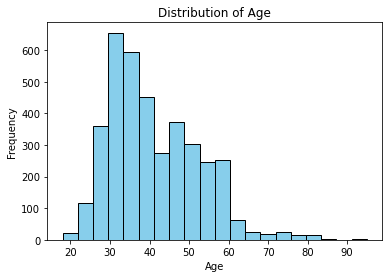

In [15]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [16]:
df["Marital"].value_counts(normalize = True)

married     0.576178
single      0.299738
divorced    0.124084
Name: Marital, dtype: float64

<AxesSubplot:>

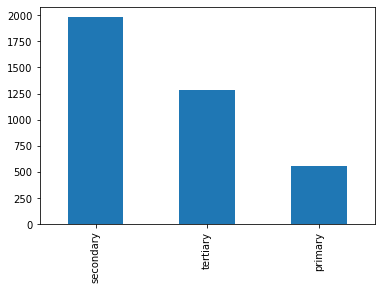

In [17]:
df['Education'].value_counts().plot.bar()

In [18]:
df['Job'].value_counts()

management       867
blue-collar      728
technician       639
admin.           445
services         321
retired          230
self-employed    133
unemployed       128
entrepreneur     118
student          106
housemaid        105
Name: Job, dtype: int64

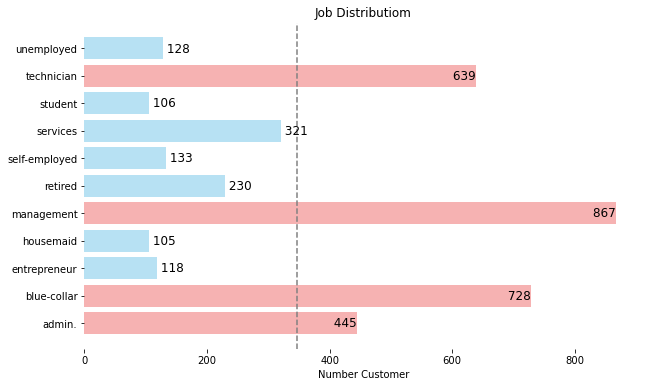

In [19]:
import matplotlib.pyplot as plt

# Lấy dữ liệu
job_counts = df['Job'].value_counts().sort_index()
# Tính chỉ số trung bình
mean_value = job_counts.mean()

# Tạo mảng màu sắc
colors = ['skyblue' if count <= mean_value else 'lightcoral' for count in job_counts.values]

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ dải màu
ax.barh(job_counts.index, job_counts.values, color=colors, alpha=0.6)

# Vẽ thanh chỉ số trung bình
ax.axvline(mean_value, color="gray", linestyle='--')

# Vẽ chỉ số thực tế
for i, (job, count) in enumerate(job_counts.items()):
    ax.text(count, i, f' {count}', ha='left' if count <= mean_value else 'right', va='center', fontsize=12, color='black')

# Đặt tên cho các nhóm
ax.set_yticks(range(len(job_counts)))
ax.set_yticklabels(job_counts.index)

# Đặt tiêu đề và nhãn trục
ax.set_title('Job Distributiom')
ax.set_xlabel('Number Customer')

# Ẩn các trục
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hiển thị biểu đồ
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

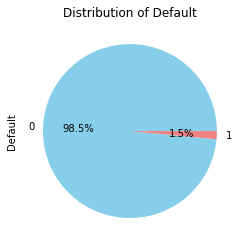

In [20]:
df['Default'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Default')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

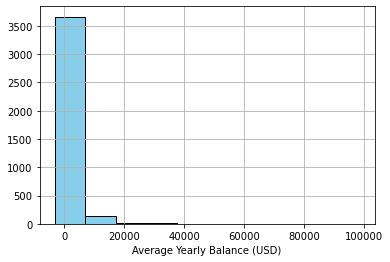

In [21]:
plt.hist(df['Balance'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Yearly Balance (USD)')
plt.grid(True)
plt.show

Text(0.5, 1.0, 'Home Insurance Participation')

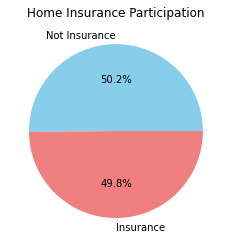

In [22]:

insurance_counts = df['HHInsurance'].value_counts()
insurance_counts
plt.pie(insurance_counts, labels=['Not Insurance','Insurance'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Home Insurance Participation')


Text(0.5, 1.0, 'Car Loan Participation')

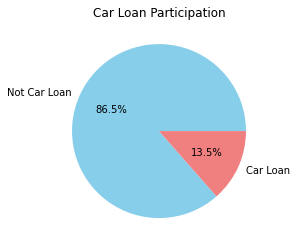

In [23]:
CarLoan_counts = df['CarLoan'].value_counts()
CarLoan_counts
plt.pie(CarLoan_counts, labels=['Not Car Loan','Car Loan'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Car Loan Participation')

In [32]:
Marrial = df['Marital'].value_counts()
Marrial

married     2201
single      1145
divorced     474
Name: Marital, dtype: int64

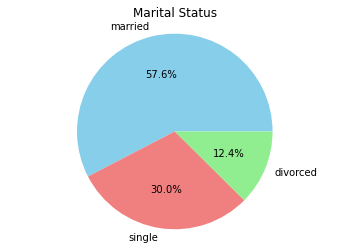

In [37]:
plt.pie(Marrial, labels=Marrial.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','lightgreen'])
plt.title('Marital Status')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
insurance_counts = df['CarInsurance'].value_counts()
insurance_counts

0    2299
1    1521
Name: CarInsurance, dtype: int64

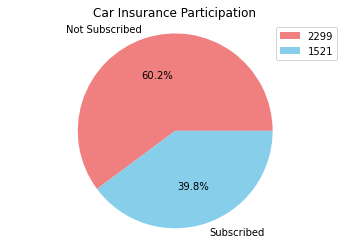

In [29]:
# Tạo dữ liệu
insurance_counts = df['CarInsurance'].value_counts()

# Vẽ biểu đồ tròn cho tỷ lệ người tham gia bảo hiểm ô tô
plt.pie(insurance_counts, labels=['Not Subscribed', 'Subscribed'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Car Insurance Participation')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị chú thích màu sắc bên ngoài với số lượng người mua bảo hiểm xe
plt.legend(loc='upper right', labels=insurance_counts)

plt.show()


In [25]:
df.to_csv(r'C:\Users\HELLO\Desktop\SQL_project\telemarketing\CarInsurance.csv', index=False)